In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyfits

from astropy.stats import LombScargle
plt.style.use('seaborn-whitegrid')

%matplotlib inline
%config InlineBackend.figure_format='svg'
#%config InlineBackend.figure_format='retina'

In [23]:
def get_lc_path(path):   
    lightcurve=pyfits.open(path)
    #barylc=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/bary01.lc')
    header=lightcurve[0].header
    print('originlc:')
    print(repr(header[:]),'\n')
    obstime=header['DATE-OBS']
    time=lightcurve[1].data['TIME']
    count=lightcurve[1].data['RATE']
    plt.figure(figsize=(int(time[-1]/1000+6),6))
    plt.plot(time,count)
    plt.xticks(np.arange(0,time[-1]+1000,1000),rotation=30)
    return time,count,obstime


    

In [3]:
def get_interval_time(time):
    size=len(time)
    index=[]
    index1=[0]
    for i in np.arange(len(time)-1):
        if time[i+1]-time[i]>20:
            index.append(i)
            index1.append(i+1)
    index.append(len(time)-1)        
    return time[index],time[index1]
  

In [53]:
def lc_pds(time,count,timemin,timemax):
    t=[]
    x=[]
    for index,(t_,c_) in enumerate(zip(time,count)):
        if (t_>=timemin and t_<timemax):
            t.append(t_)
            x.append(c_)   
    xF = np.fft.fft(x)
    freq = np.fft.fftfreq(len(t))
    ls = LombScargle(t, x)
    freq_ls, power_ls = ls.autopower(normalization='standard',
                           minimum_frequency=0,
                           maximum_frequency=0.5,
                           samples_per_peak=10)
    plt.figure(figsize=(6,6))
    plt.subplot(311)
    plt.title('%s:from %d to %d'%(obstime,t[0],t[-1]))
    plt.plot(t,x)
    #plt.xticks(np.arange(0,t[-1]+1000,1000),rotation=30)
    plt.semilogy()
    plt.xlabel('time')
    plt.ylabel('count')
    plt.subplot(312)
    plt.plot(freq,abs(xF)**2)
    plt.semilogx()
    plt.semilogy()
    plt.ylabel('power/fft')
    plt.subplot(313)
    plt.plot(freq_ls,power_ls)
    plt.semilogx()
    plt.semilogy()
    plt.xlabel('frequency/Hz')
    plt.ylabel('power/ls')
    plt.tight_layout()
  

In [6]:
def get_lc__pds_path(path):   
    lightcurve=pyfits.open(path)
    #barylc=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/bary01.lc')
    header=lightcurve[0].header
    obstime=header['DATE-OBS']
    time=lightcurve[1].data['TIME']
    count=lightcurve[1].data['RATE']
    indexleft,indexright=get_interval_time(time)
    for i,(indexleft_,indexright_) in enumerate(zip(indexleft,indexright)):
        print(i,indexright_,indexleft_)
        lc_pds(time,count,indexright_,indexleft_)

In [10]:
def getfreq(freq,p,minfre=0.001,maxfre=0.5):
    max_p=0
    max_f=0
    for index,(freq_i,p_i) in enumerate(zip(freq,p)):
        if (freq_i>minfre and freq_i<maxfre and p_i>max_p):
            max_p=p_i
            max_f=freq_i
    return max_f,max_p

In [ ]:
lc_pds(time,count,timemin=min(time),timemax=max(time))

originlc:
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
TELESCOP= 'SWIFT   '           / Telescope (mission) name                       
DATAMODE= 'WINDOWED'           / Datamode                                       
DETNAM  = 'NONE    '           / Detector                                       
INSTRUME= 'XRT     '           / Instrument name                                
OBJECT  = 'V404Cyg '           / Name of observed object                        
ONTIME  = 2.995764524579048E+03 / On-source time                                
DEADC   =       9.

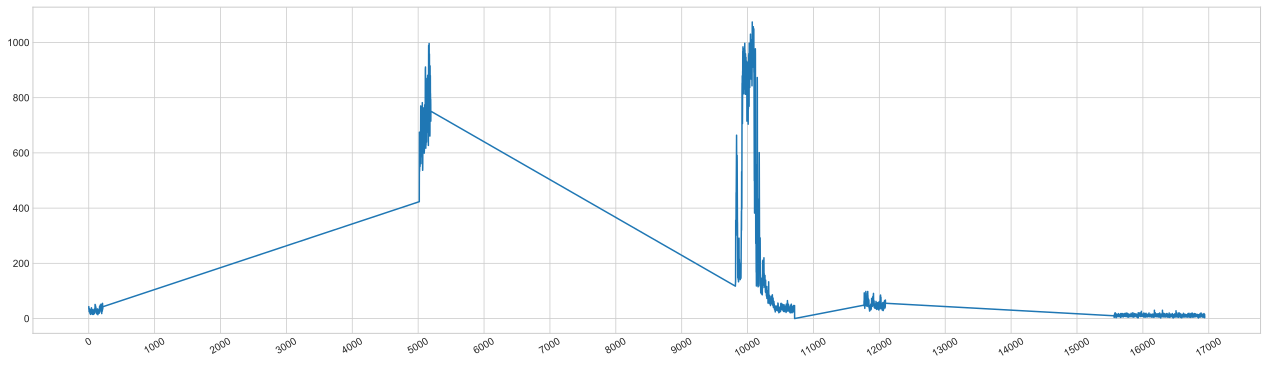

In [51]:
path='/Volumes/Seagate_Backup_Plus_Drive_Lvb/V404cyg/xrt0622/00031403049_xrt/src.lc'
time,count,obstime=get_lc_path(path)


0 0.0 214.0


/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


1 5017.0 5193.0
2 9815.0 10714.0
3 11767.0 12093.0
4 15560.0 16939.0


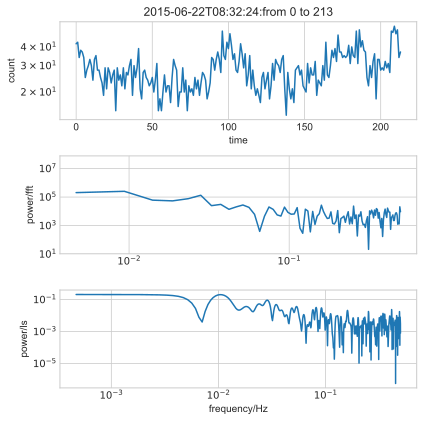

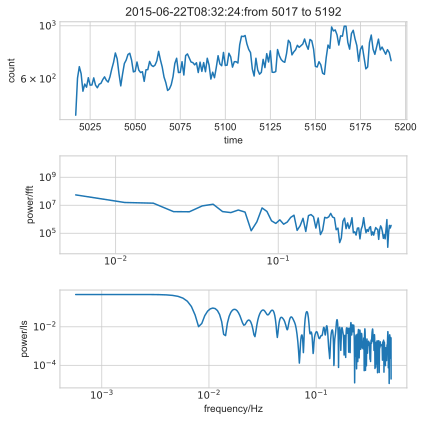

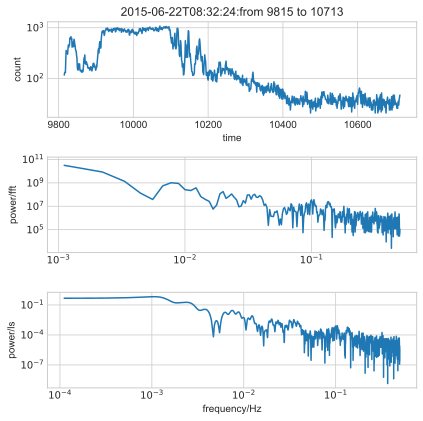

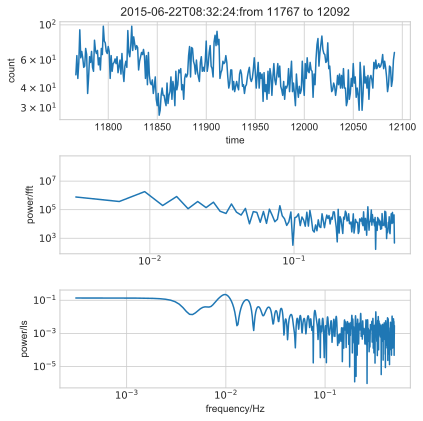

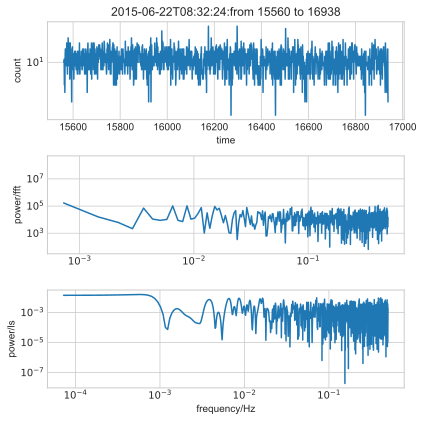

In [54]:
get_lc__pds_path(path)

/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:122: RuntimeWarning: divide by zero encountered in true_divide
  power = (YC * YC / CC + YS * YS / SS)
/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:122: RuntimeWarning: invalid value encountered in true_divide
  power = (YC * YC / CC + YS * YS / SS)


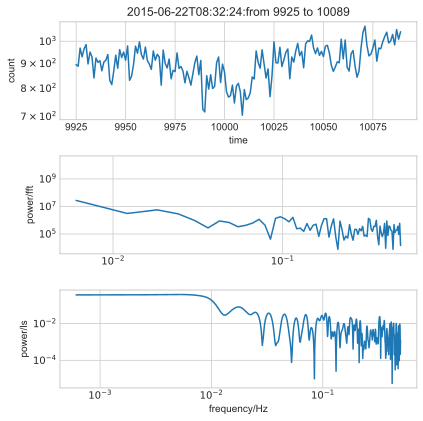

In [55]:
lc_pds(time,count,timemin=9925,timemax=10090)

/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


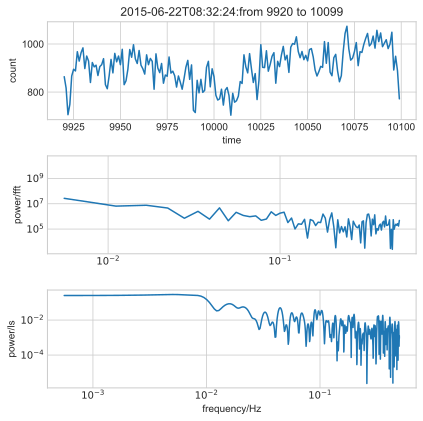

In [30]:
lc_pds(time,count,timemin=9920,timemax=10100)

originlc:
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
TELESCOP= 'SWIFT   '           / Telescope (mission) name                       
DATAMODE= 'WINDOWED'           / Datamode                                       
DETNAM  = 'NONE    '           / Detector                                       
INSTRUME= 'XRT     '           / Instrument name                                
OBJECT  = 'V404Cyg '           / Name of observed object                        
ONTIME  = 1.912410204529762E+03 / On-source time                                
DEADC   =       9.

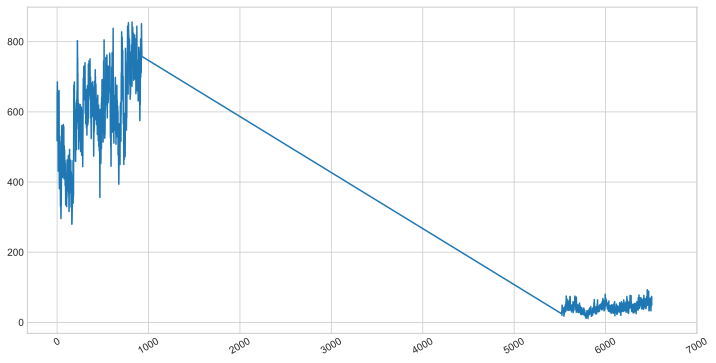

In [31]:
path='/Volumes/Seagate_Backup_Plus_Drive_Lvb/V404cyg/xrt0622/00031403047_xrt/src.lc'
time,count,obstime=get_lc_path(path)


0 0.0 927.0
1 5520.0 6505.0


/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


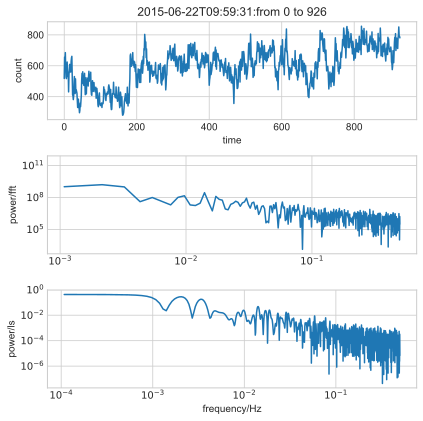

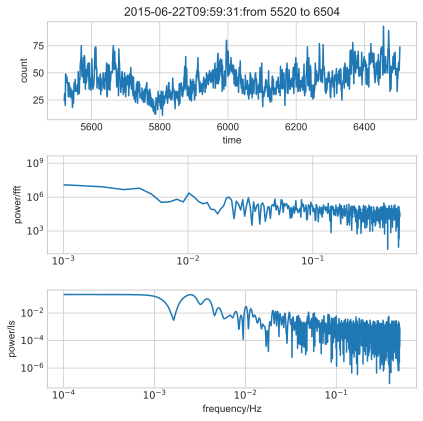

In [32]:
get_lc__pds_path(path)

originlc:
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
TELESCOP= 'SWIFT   '           / Telescope (mission) name                       
DATAMODE= 'WINDOWED'           / Datamode                                       
DETNAM  = 'NONE    '           / Detector                                       
INSTRUME= 'XRT     '           / Instrument name                                
OBJECT  = 'V404Cyg '           / Name of observed object                        
ONTIME  = 9.446140580177307E+02 / On-source time                                
DEADC   =       9.

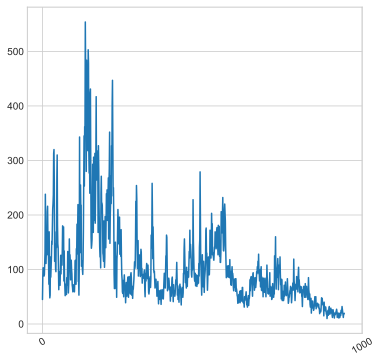

In [33]:
path='/Volumes/Seagate_Backup_Plus_Drive_Lvb/V404cyg/xrt0622/00031403045_xrt/src.lc'
time,count,obstime=get_lc_path(path)


0 0.0 944.0


/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


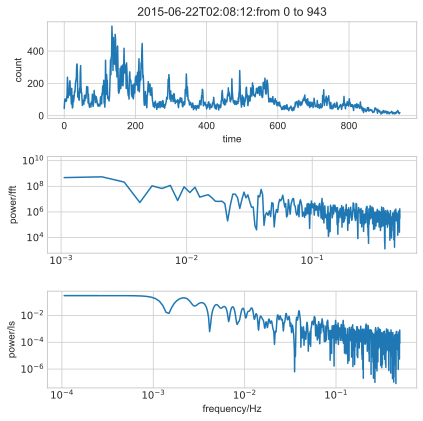

In [34]:
get_lc__pds_path(path)

originlc:
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
TELESCOP= 'SWIFT   '           / Telescope (mission) name                       
DATAMODE= 'WINDOWED'           / Datamode                                       
DETNAM  = 'NONE    '           / Detector                                       
INSTRUME= 'XRT     '           / Instrument name                                
OBJECT  = 'V404Cyg '           / Name of observed object                        
ONTIME  = 1.448618990182877E+03 / On-source time                                
DEADC   =       9.

/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


1 5558.0 6442.0


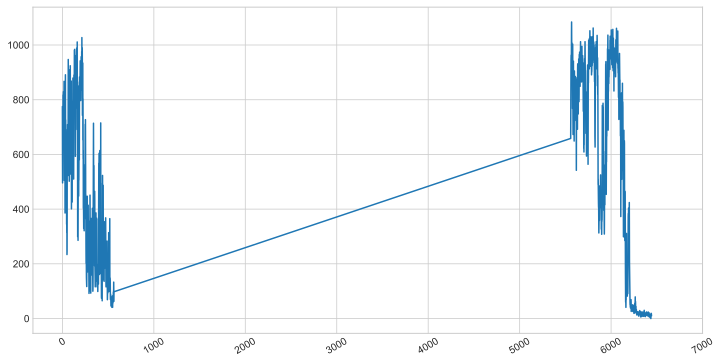

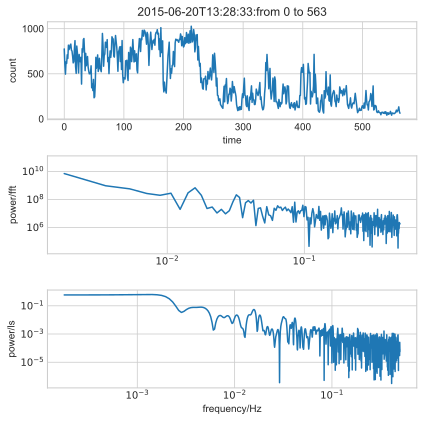

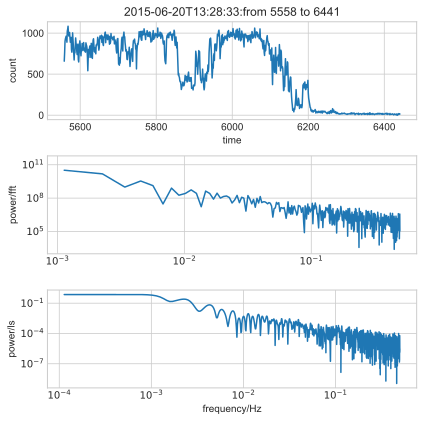

In [35]:
path='/Volumes/Seagate_Backup_Plus_Drive_Lvb/V404cyg/xrt0620/00031403040_xrt/src.lc'
time,count,obstime=get_lc_path(path)
get_lc__pds_path(path)

/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


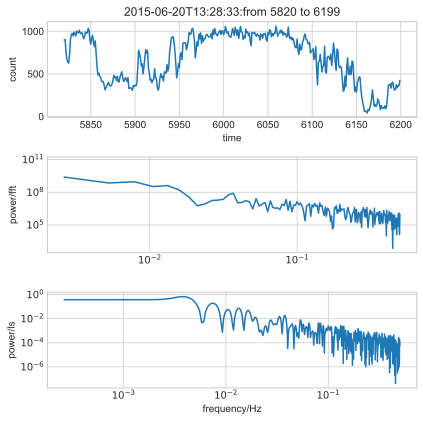

In [38]:
lc_pds(time,count, 5820,6200)

/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


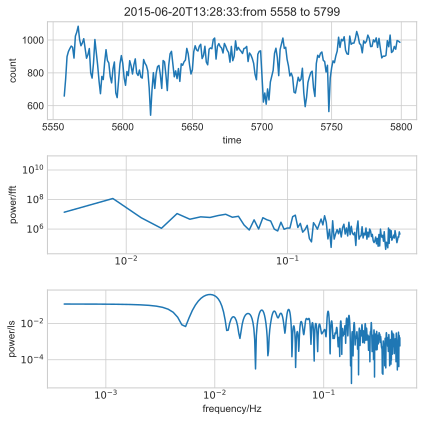

In [36]:
lc_pds(time,count,5558, 5800)

originlc:
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
TELESCOP= 'SWIFT   '           / Telescope (mission) name                       
DATAMODE= 'WINDOWED'           / Datamode                                       
DETNAM  = 'NONE    '           / Detector                                       
INSTRUME= 'XRT     '           / Instrument name                                
OBJECT  = 'V404Cyg '           / Name of observed object                        
ONTIME  = 1.264126572787762E+03 / On-source time                                
DEADC   =       9.

/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


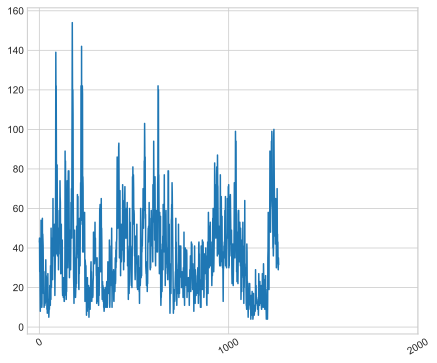

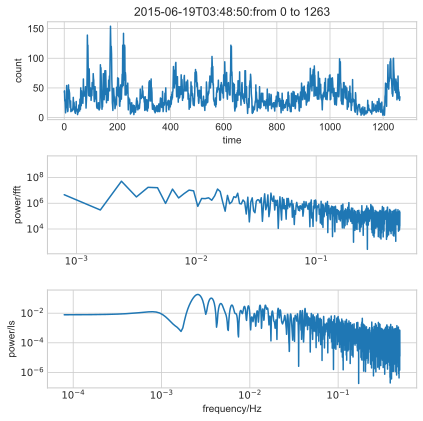

In [39]:
path='/Volumes/Seagate_Backup_Plus_Drive_Lvb/V404cyg/xrt0620/00031403042_xrt/src.lc'
time,count,obstime=get_lc_path(path)
get_lc__pds_path(path)

In [ ]:
lc_pds(time,count,5558, 5800)

originlc:
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
TELESCOP= 'SWIFT   '           / Telescope (mission) name                       
DATAMODE= 'PHOTON  '           / Datamode                                       
DETNAM  = 'NONE    '           / Detector                                       
INSTRUME= 'XRT     '           / Instrument name                                
OBJECT  = 'V404Cyg '           / Name of observed object                        
ONTIME  = 3.008760005235672E+01 / On-source time                                
DEADC   =       9.

ValueError: Invalid number of FFT data points (0) specified.

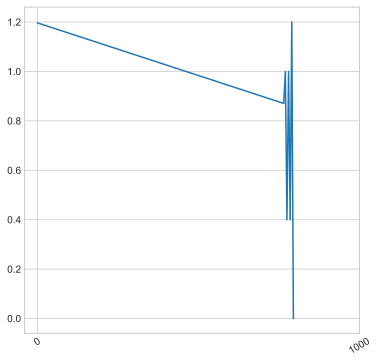

In [41]:
path='/Volumes/Seagate_Backup_Plus_Drive_Lvb/V404cyg/xrt0620/00031403043_xrt/src.lc'
time,count,obstime=get_lc_path(path)
get_lc__pds_path(path)

originlc:
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
TELESCOP= 'SWIFT   '           / Telescope (mission) name                       
DATAMODE= 'WINDOWED'           / Datamode                                       
DETNAM  = 'NONE    '           / Detector                                       
INSTRUME= 'XRT     '           / Instrument name                                
OBJECT  = 'V404Cyg '           / Name of observed object                        
ONTIME  = 1.029766867995262E+03 / On-source time                                
DEADC   =       9.

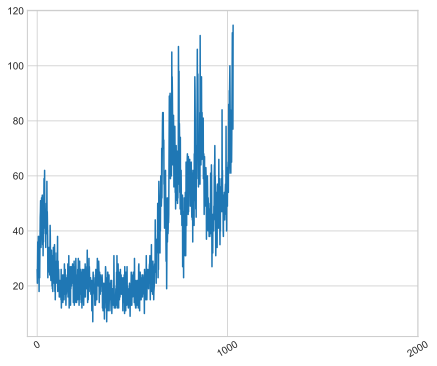

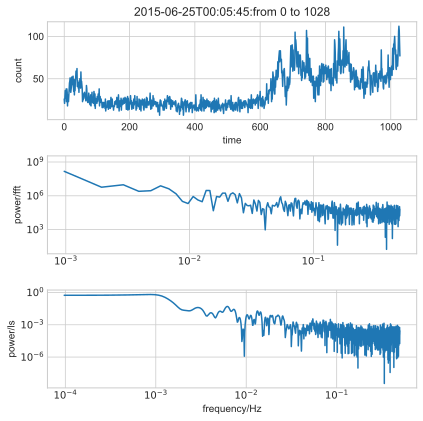

In [42]:
path='/Volumes/Seagate_Backup_Plus_Drive_Lvb/V404cyg/xrt0625_0626/00031403055_xrt/src.lc'
time,count,obstime=get_lc_path(path)
get_lc__pds_path(path)

originlc:
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
TELESCOP= 'SWIFT   '           / Telescope (mission) name                       
DATAMODE= 'WINDOWED'           / Datamode                                       
DETNAM  = 'NONE    '           / Detector                                       
INSTRUME= 'XRT     '           / Instrument name                                
OBJECT  = 'V404Cyg '           / Name of observed object                        
ONTIME  = 8.197800970077515E+02 / On-source time                                
DEADC   =       9.

/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


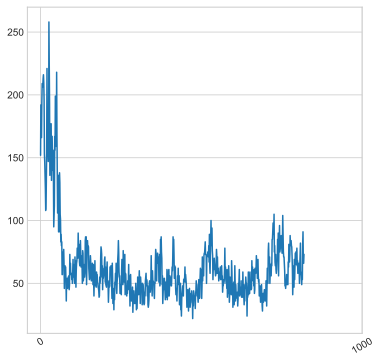

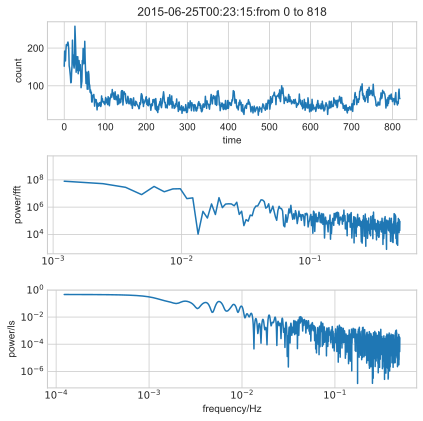

In [43]:
path='/Volumes/Seagate_Backup_Plus_Drive_Lvb/V404cyg/xrt0625_0626/00031403056_xrt/src.lc'
time,count,obstime=get_lc_path(path)
get_lc__pds_path(path)

originlc:
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
TELESCOP= 'SWIFT   '           / Telescope (mission) name                       
DATAMODE= 'WINDOWED'           / Datamode                                       
DETNAM  = 'NONE    '           / Detector                                       
INSTRUME= 'XRT     '           / Instrument name                                
OBJECT  = 'V404Cyg '           / Name of observed object                        
ONTIME  = 2.782141847193241E+03 / On-source time                                
DEADC   =       9.

/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


1 3756.0 5131.0


/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:122: RuntimeWarning: divide by zero encountered in true_divide
  power = (YC * YC / CC + YS * YS / SS)
/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:122: RuntimeWarning: invalid value encountered in true_divide
  power = (YC * YC / CC + YS * YS / SS)


2 9454.0 10409.0


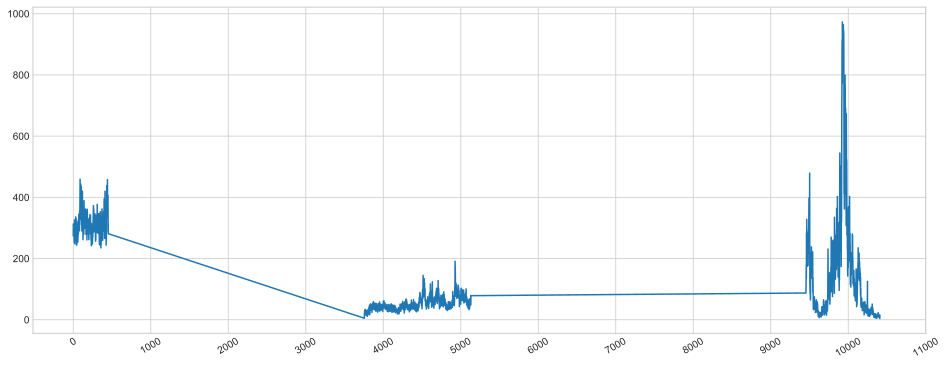

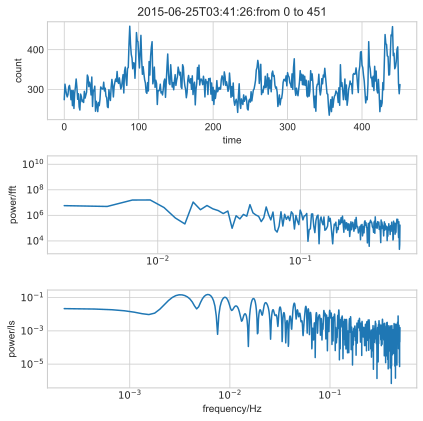

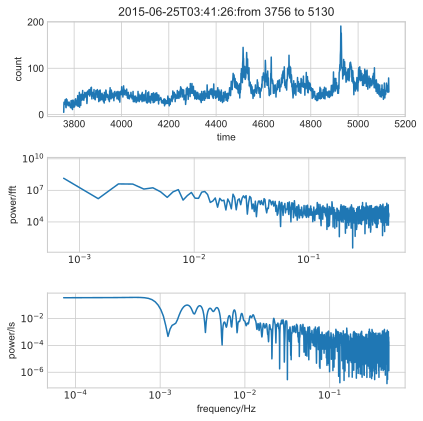

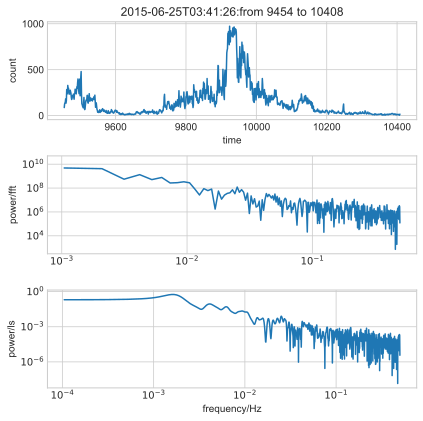

In [44]:
path='/Volumes/Seagate_Backup_Plus_Drive_Lvb/V404cyg/xrt0625_0626/00031403057_xrt/src.lc'
time,count,obstime=get_lc_path(path)
get_lc__pds_path(path)

originlc:
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
TELESCOP= 'SWIFT   '           / Telescope (mission) name                       
DATAMODE= 'WINDOWED'           / Datamode                                       
DETNAM  = 'NONE    '           / Detector                                       
INSTRUME= 'XRT     '           / Instrument name                                
OBJECT  = 'V404Cyg '           / Name of observed object                        
ONTIME  = 1.314612998127937E+03 / On-source time                                
DEADC   =       9.

/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


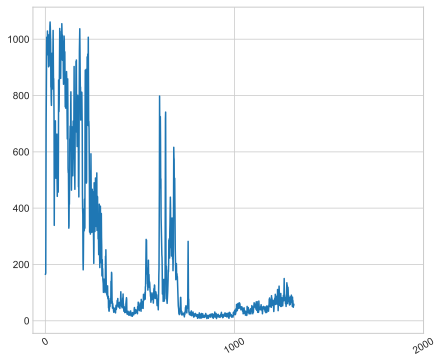

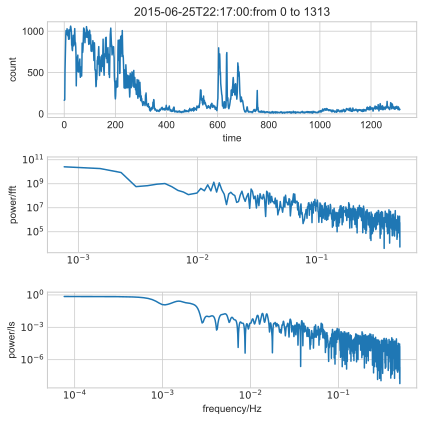

In [45]:
path='/Volumes/Seagate_Backup_Plus_Drive_Lvb/V404cyg/xrt0625_0626/00031403058_xrt/src.lc'
time,count,obstime=get_lc_path(path)
get_lc__pds_path(path)

originlc:
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
TELESCOP= 'SWIFT   '           / Telescope (mission) name                       
DATAMODE= 'WINDOWED'           / Datamode                                       
DETNAM  = 'NONE    '           / Detector                                       
INSTRUME= 'XRT     '           / Instrument name                                
OBJECT  = 'V404Cyg '           / Name of observed object                        
ONTIME  = 9.582224190235138E+00 / On-source time                                
DEADC   =       9.

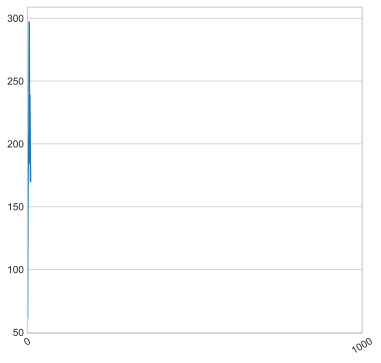

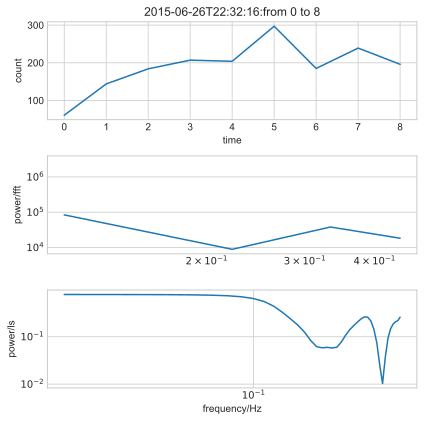

In [46]:
path='/Volumes/Seagate_Backup_Plus_Drive_Lvb/V404cyg/xrt0625_0626/00031403059_xrt/src.lc'
time,count,obstime=get_lc_path(path)
get_lc__pds_path(path)

originlc:
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
TELESCOP= 'SWIFT   '           / Telescope (mission) name                       
DATAMODE= 'WINDOWED'           / Datamode                                       
DETNAM  = 'NONE    '           / Detector                                       
INSTRUME= 'XRT     '           / Instrument name                                
OBJECT  = 'V404Cyg '           / Name of observed object                        
ONTIME  = 1.444617722630501E+03 / On-source time                                
DEADC   =       9.

/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:122: RuntimeWarning: divide by zero encountered in true_divide
  power = (YC * YC / CC + YS * YS / SS)
/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:122: RuntimeWarning: invalid value encountered in true_divide
  power = (YC * YC / CC + YS * YS / SS)


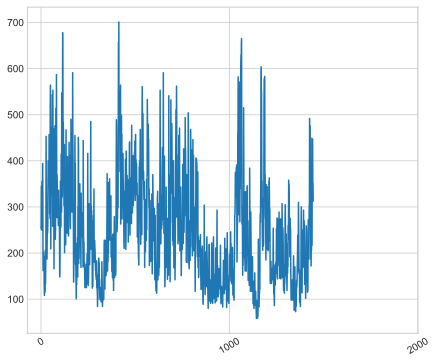

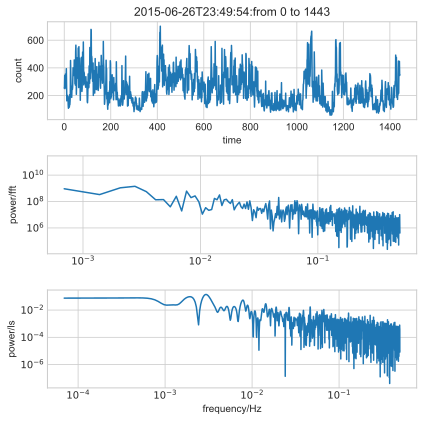

In [47]:
path='/Volumes/Seagate_Backup_Plus_Drive_Lvb/V404cyg/xrt0625_0626/00031403060_xrt/src.lc'
time,count,obstime=get_lc_path(path)
get_lc__pds_path(path)

originlc:
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
TELESCOP= 'SWIFT   '           / Telescope (mission) name                       
DATAMODE= 'WINDOWED'           / Datamode                                       
DETNAM  = 'NONE    '           / Detector                                       
INSTRUME= 'XRT     '           / Instrument name                                
OBJECT  = 'V404Cyg '           / Name of observed object                        
ONTIME  = 1.499763694286346E+03 / On-source time                                
DEADC   =       9.

/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


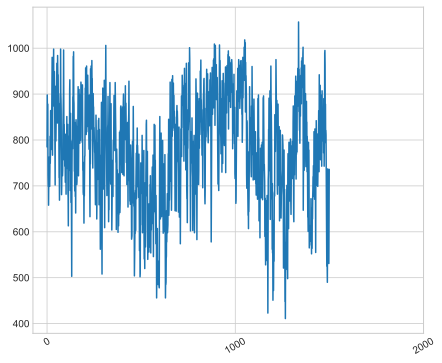

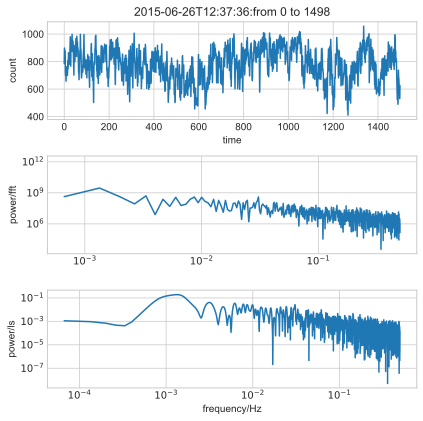

In [48]:
path='/Volumes/Seagate_Backup_Plus_Drive_Lvb/V404cyg/xrt0625_0626/00033861001_xrt/src.lc'
time,count,obstime=get_lc_path(path)
get_lc__pds_path(path)